In [839]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler


# Cargar el dataset
df = pd.read_csv('avocado.csv')
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [840]:
df.columns
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


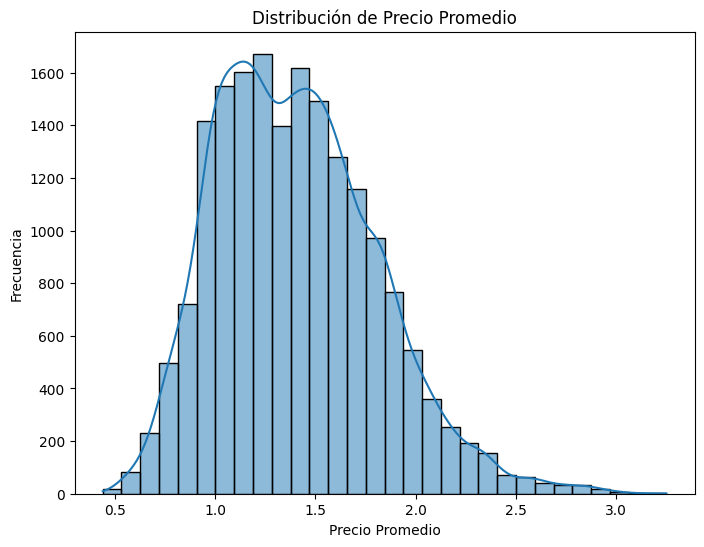

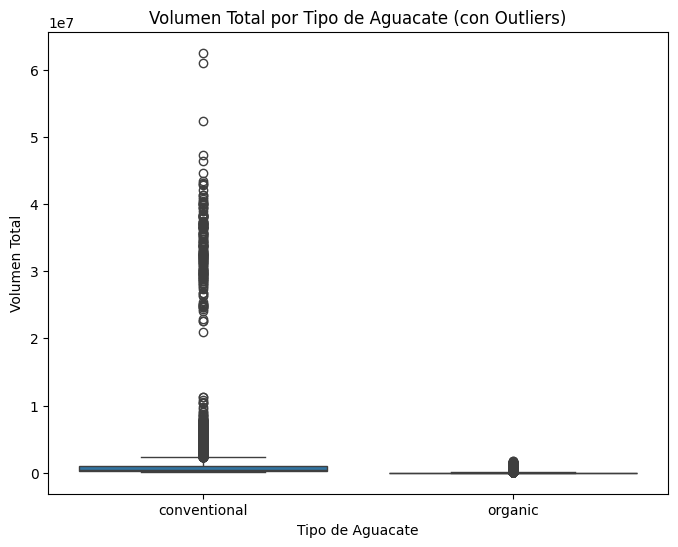

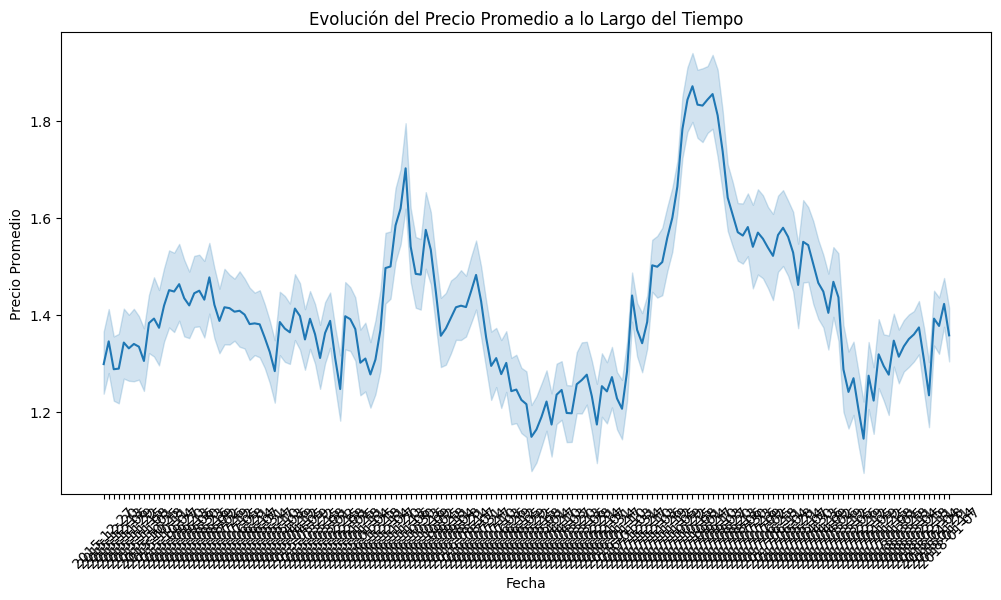

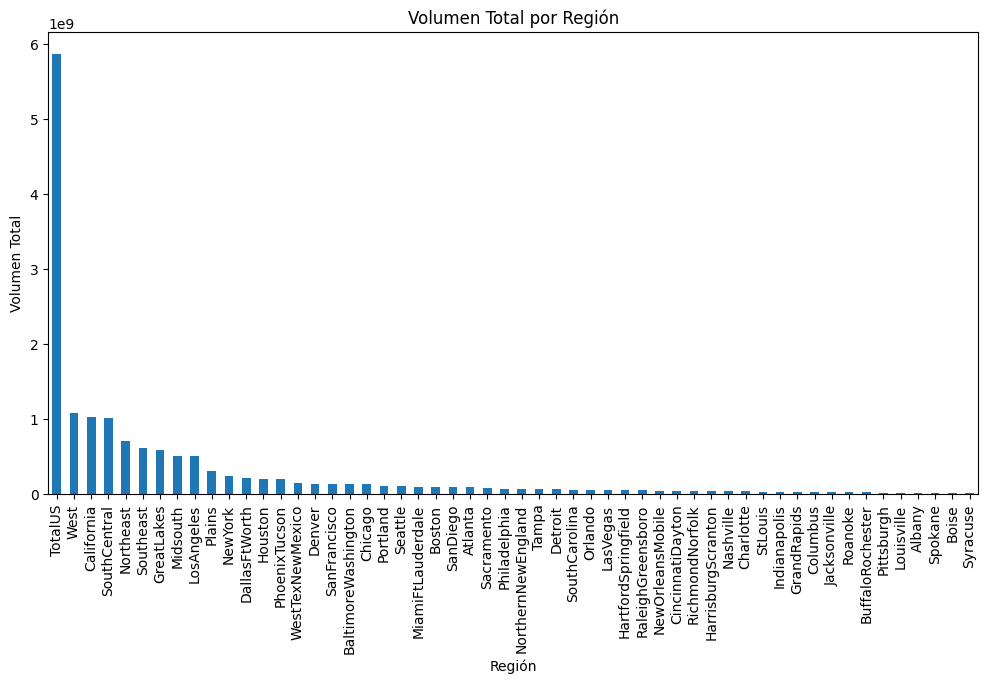

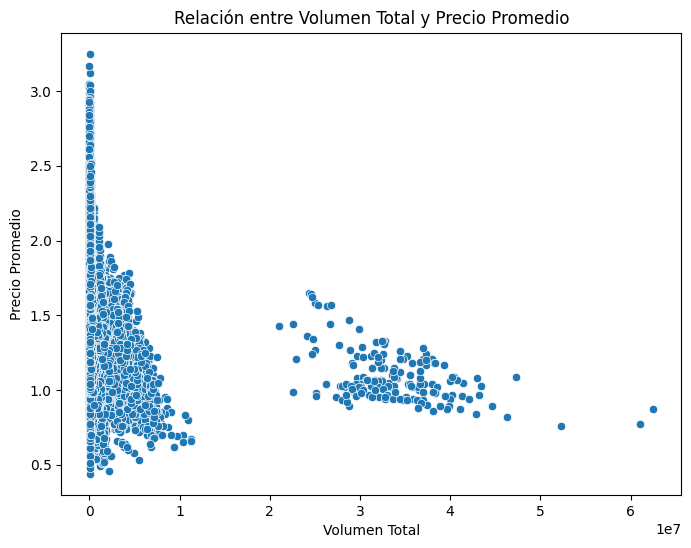

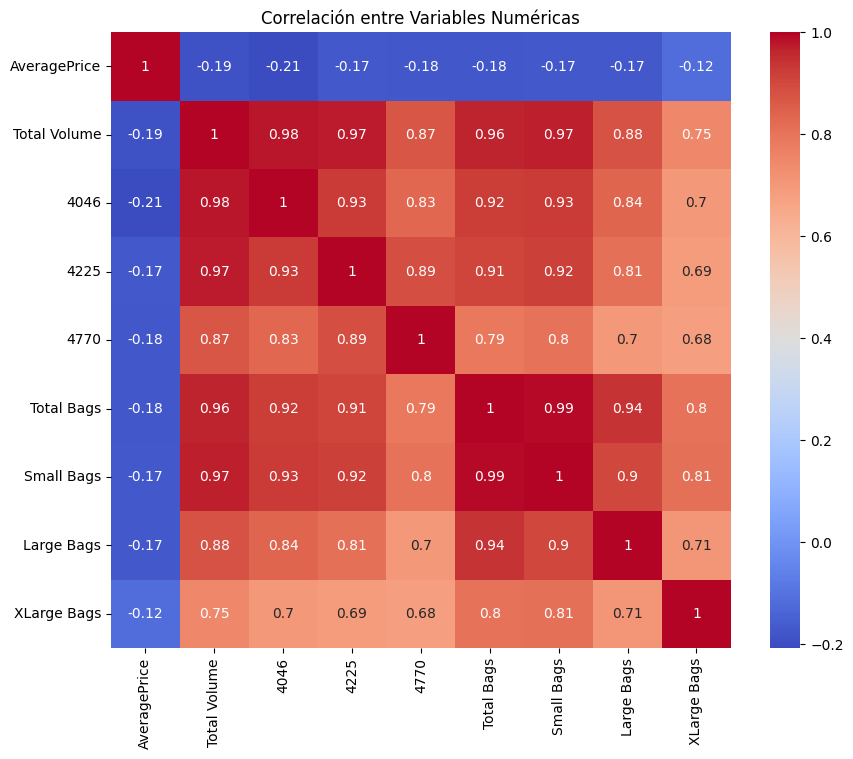

<Figure size 1200x800 with 0 Axes>

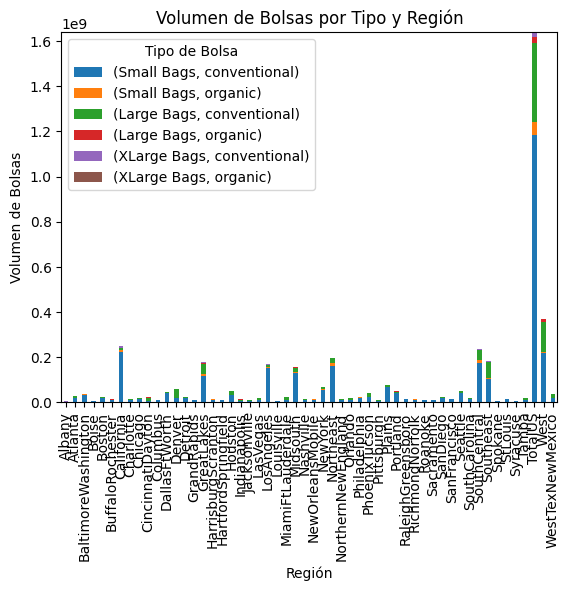

<Figure size 1200x600 with 0 Axes>

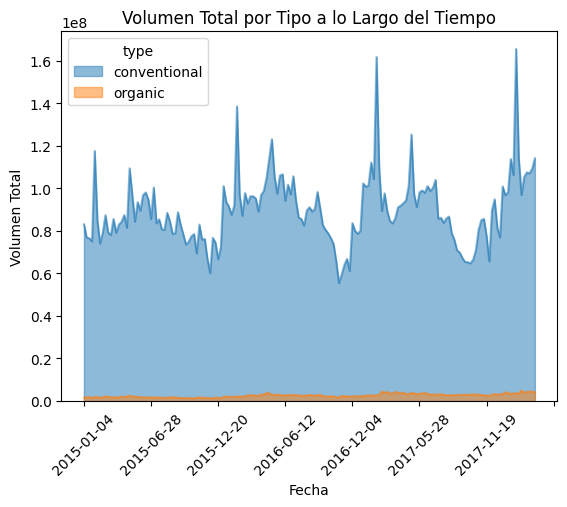

In [841]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Supongamos que ya has cargado tu DataFrame y se llama 'df'

df_grafica = df.copy()
df_grafica


# 1. Histograma: Distribución de AveragePrice
plt.figure(figsize=(8, 6))
sns.histplot(df_grafica['AveragePrice'], bins=30, kde=True)
plt.title('Distribución de Precio Promedio')
plt.xlabel('Precio Promedio')
plt.ylabel('Frecuencia')
plt.show()

# Propósito:
#   -   Muestra la distribución de la variable `AveragePrice`.
#   -   Permite observar la frecuencia de diferentes rangos de precios.
#   -   `kde=True` añade una estimación de la densidad de kernel para suavizar la distribución.

# 2. Boxplot: Detección de Outliers en Total Volume por tipo
plt.figure(figsize=(8, 6))
sns.boxplot(x='type', y='Total Volume', data=df_grafica)
plt.title('Volumen Total por Tipo de Aguacate (con Outliers)')
plt.xlabel('Tipo de Aguacate')
plt.ylabel('Volumen Total')
plt.show()

# Propósito:
#   -   Compara la distribución de `Total Volume` entre los tipos de aguacate.
#   -   Identifica posibles valores atípicos (outliers) en el volumen.

# 3. Gráfico de Líneas: Evolución del Precio Promedio en el tiempo
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='AveragePrice', data=df_grafica)
plt.title('Evolución del Precio Promedio a lo Largo del Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Precio Promedio')
plt.xticks(rotation=45)  # Rotar las fechas para mejor legibilidad
plt.show()

# Propósito:
#   -   Muestra cómo cambia el `AveragePrice` con el tiempo (`date`).
#   -   Permite identificar tendencias estacionales o a largo plazo en los precios.

# 4. Gráfico de Barras: Total Volume por Region
plt.figure(figsize=(12, 6))
region_volume = df_grafica.groupby('region')['Total Volume'].sum().sort_values(ascending=False)
region_volume.plot(kind='bar')
plt.title('Volumen Total por Región')
plt.xlabel('Región')
plt.ylabel('Volumen Total')
plt.xticks(rotation=90)
plt.show()

# Propósito:
#   -   Compara el `Total Volume` vendido en diferentes `region`es.
#   -   `sort_values` ordena las regiones por volumen para facilitar la comparación.

# 5. Scatter Plot: Relación entre Total Volume y AveragePrice
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Total Volume', y='AveragePrice', data=df_grafica)
plt.title('Relación entre Volumen Total y Precio Promedio')
plt.xlabel('Volumen Total')
plt.ylabel('Precio Promedio')
plt.show()

# Propósito:
#   -   Explora si existe una correlación entre la cantidad de aguacates vendidos (`Total Volume`) y su precio (`AveragePrice`).
#   -   Ayuda a visualizar si hay patrones de oferta y demanda.

# 6. Heatmap: Correlación entre variables numéricas
plt.figure(figsize=(10, 8))
corr_matrix = df_grafica[['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlación entre Variables Numéricas')
plt.show()

# Propósito:
#   -   Muestra la correlación entre múltiples variables numéricas.
#   -   `annot=True` muestra los coeficientes de correlación en el heatmap.
#   -   `cmap='coolwarm'` usa un esquema de colores para representar la fuerza y dirección de la correlación.

# 7. Gráfico de barras apiladas: Volumen de bolsas por tipo y región
plt.figure(figsize=(12, 8))
df_bags = df_grafica.groupby(['region', 'type'])[['Small Bags', 'Large Bags', 'XLarge Bags']].sum().unstack()
df_bags.plot(kind='bar', stacked=True)
plt.title('Volumen de Bolsas por Tipo y Región')
plt.xlabel('Región')
plt.ylabel('Volumen de Bolsas')
plt.xticks(rotation=90)
plt.legend(title='Tipo de Bolsa')
plt.show()

# Propósito:
#   -   Compara la distribución de los diferentes tipos de bolsas ('Small Bags', 'Large Bags', 'XLarge Bags') entre regiones y tipos de aguacate.
#   -   Permite ver qué tipo de bolsas predomina en cada región y para cada tipo de aguacate.

# 8. Gráfico de área: Volumen total por tipo a lo largo del tiempo
plt.figure(figsize=(12, 6))
df_grafica.groupby(['Date', 'type'])['Total Volume'].sum().unstack().plot(kind='area', stacked=False)
plt.title('Volumen Total por Tipo a lo Largo del Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Volumen Total')
plt.xticks(rotation=45)
plt.show()

# Propósito:
#   -   Muestra cómo el volumen total de cada tipo de aguacate ('conventional', 'organic') cambia a lo largo del tiempo.
#   -   Permite comparar las tendencias de volumen entre los tipos de aguacate.

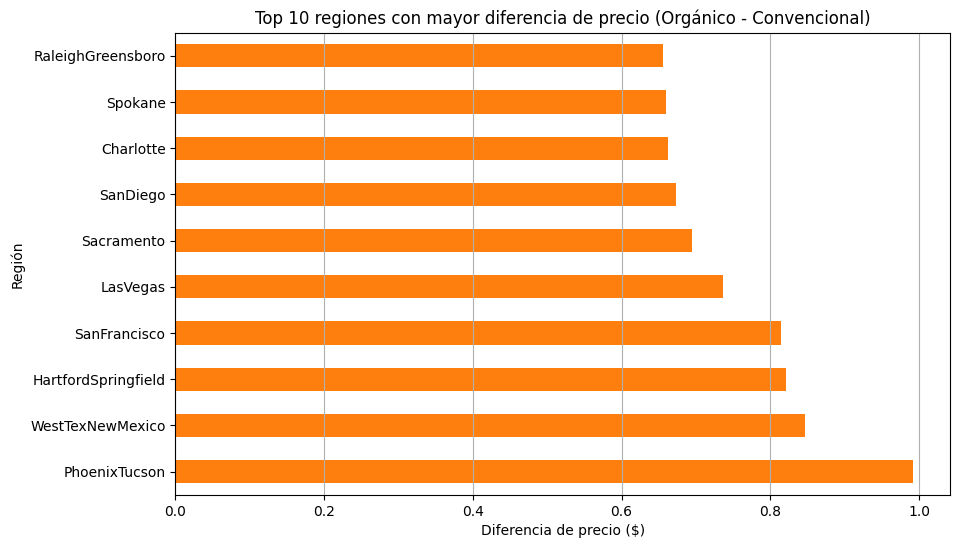

In [842]:
price_diff = df_grafica.groupby(['region', 'type'])['AveragePrice'].mean().unstack()
price_diff['diff'] = price_diff['organic'] - price_diff['conventional']
price_diff = price_diff.sort_values('diff', ascending=False).head(10)
price_diff['diff'].plot(kind='barh', figsize=(10, 6), color='#ff7f0e')
plt.title('Top 10 regiones con mayor diferencia de precio (Orgánico - Convencional)')
plt.xlabel('Diferencia de precio ($)')
plt.ylabel('Región')
plt.grid(axis='x')
plt.show()

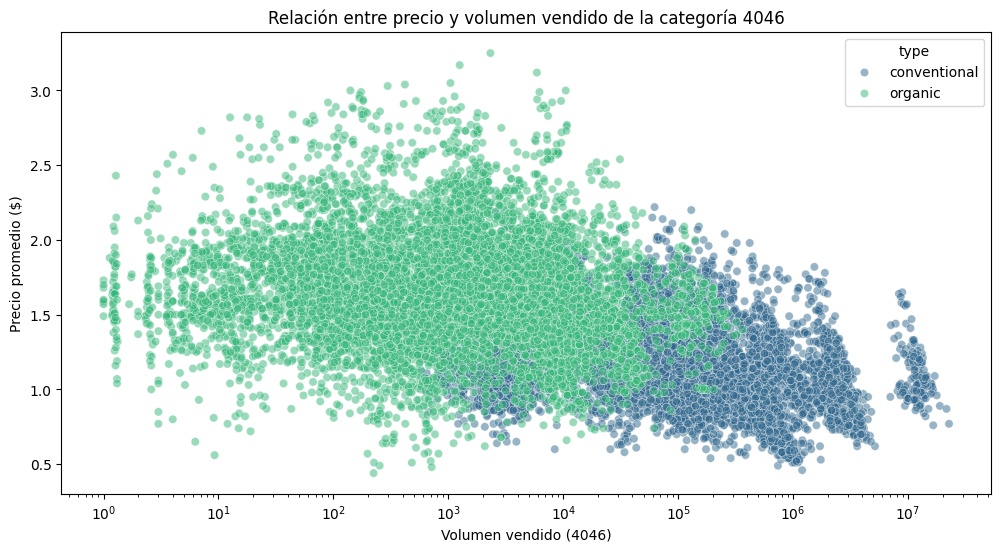

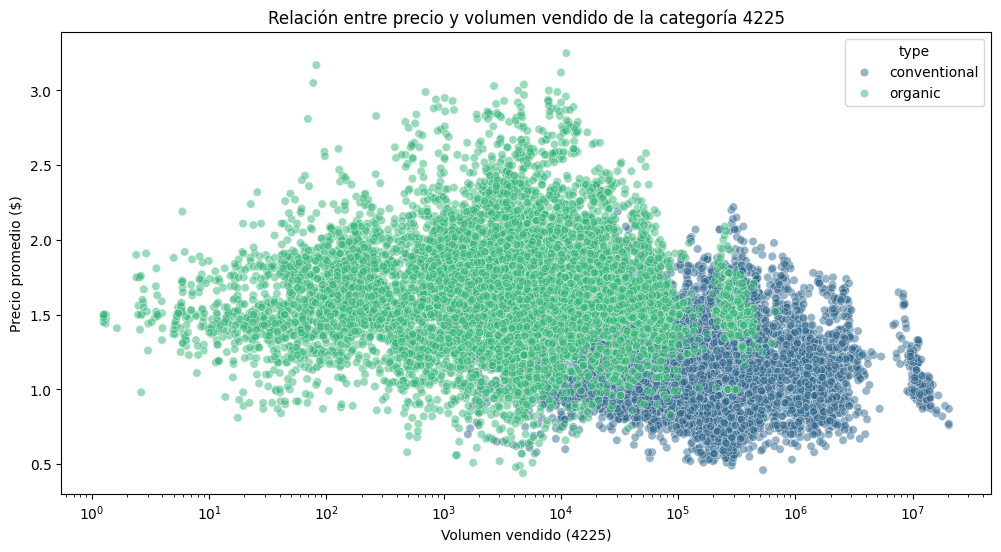

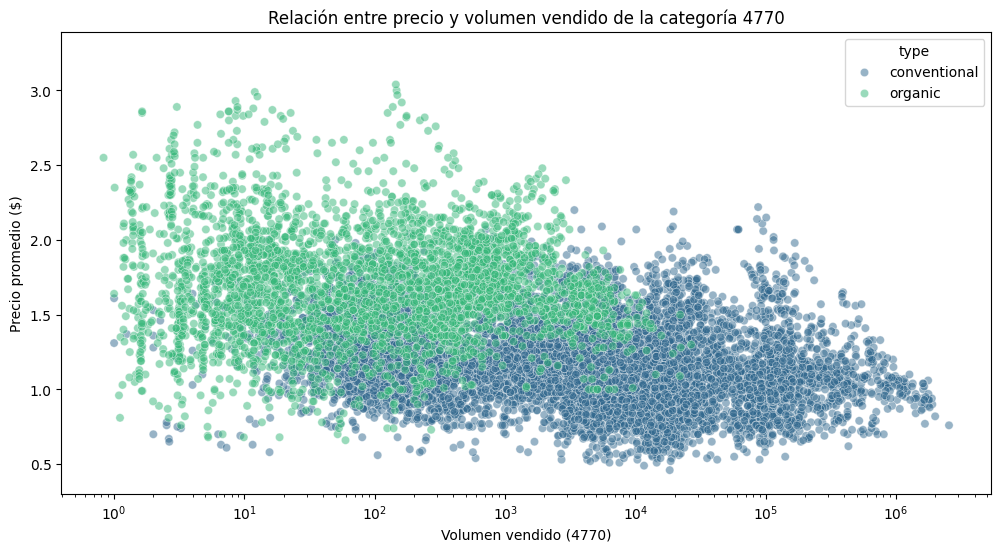

In [843]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='4046', y='AveragePrice', hue='type', data=df_grafica, alpha=0.5, palette='viridis')
plt.title('Relación entre precio y volumen vendido de la categoría 4046')
plt.xlabel('Volumen vendido (4046)')
plt.ylabel('Precio promedio ($)')
plt.xscale('log')
plt.show()

plt.figure(figsize=(12, 6))
sns.scatterplot(x='4225', y='AveragePrice', hue='type', data=df_grafica, alpha=0.5, palette='viridis')
plt.title('Relación entre precio y volumen vendido de la categoría 4225')
plt.xlabel('Volumen vendido (4225)')
plt.ylabel('Precio promedio ($)')
plt.xscale('log')
plt.show()

plt.figure(figsize=(12, 6))
sns.scatterplot(x='4770', y='AveragePrice', hue='type', data=df_grafica, alpha=0.5, palette='viridis')
plt.title('Relación entre precio y volumen vendido de la categoría 4770')
plt.xlabel('Volumen vendido (4770)')
plt.ylabel('Precio promedio ($)')
plt.xscale('log')
plt.show()

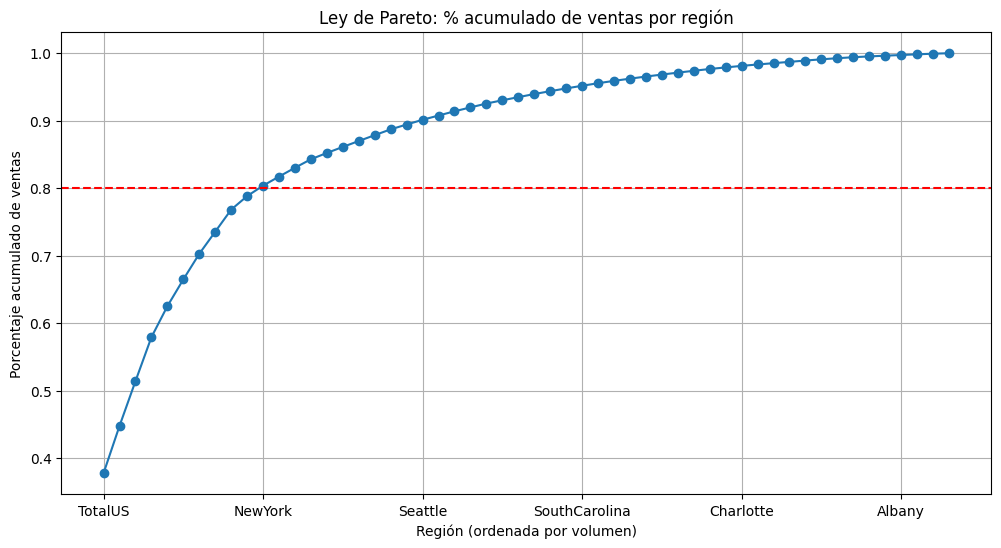

In [844]:
region_sales = df_grafica.groupby('region')['Total Volume'].sum().sort_values(ascending=False)
region_sales.cumsum().div(region_sales.sum()).plot(figsize=(12, 6), marker='o')
plt.axhline(0.8, color='r', linestyle='--')  # Línea del 80%
plt.title('Ley de Pareto: % acumulado de ventas por región')
plt.xlabel('Región (ordenada por volumen)')
plt.ylabel('Porcentaje acumulado de ventas')
plt.grid(True)
plt.show()

In [845]:
# Supongamos que estas son las columnas numéricas en el CSV
nuevos_nombres = {
    "4046": "categoria_a",
    "4225": "categoria_b",
    "4770": "categoria_c"
}

# Renombrar en el df
df.rename(columns=nuevos_nombres, inplace=True)

In [846]:
df

,Unnamed: 0,Date,AveragePrice,Total Volume,categoria_a,categoria_b,categoria_c,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [847]:
# Manejo de valores nulos
print("Valores nulos por columna:\n", df.isnull().sum())
# Si hay nulos, imputar con la media o eliminar filas
# df.fillna(df.mean(), inplace=True)

Valores nulos por columna:
 Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
categoria_a     0
categoria_b     0
categoria_c     0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64


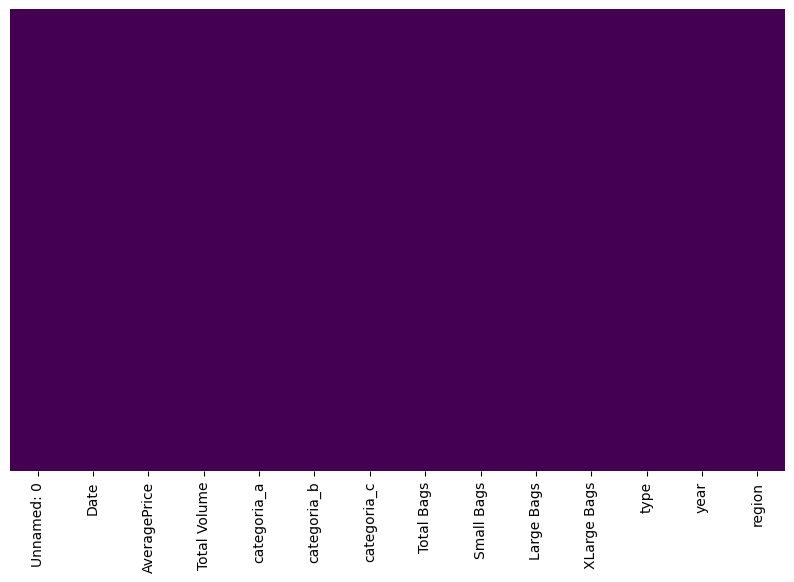

In [848]:
# Visualización de valores nulos
# Esta grafica se realizo con el fin de observar si existen valores nulos en el dataset
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.show()

In [849]:
df.columns = [col.lower().replace('%', '').strip().replace(' ', '_') for col in df.columns]
df.columns

Index(['unnamed:_0', 'date', 'averageprice', 'total_volume', 'categoria_a',
       'categoria_b', 'categoria_c', 'total_bags', 'small_bags', 'large_bags',
       'xlarge_bags', 'type', 'year', 'region'],
      dtype='object')

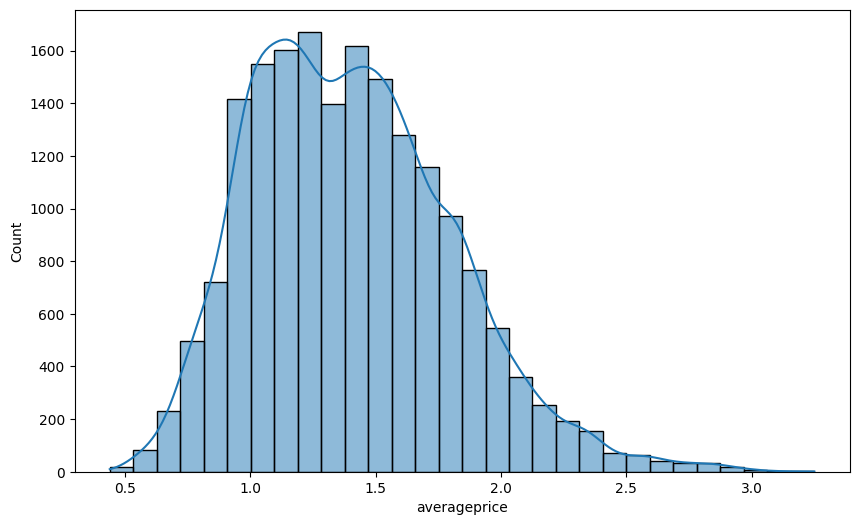

In [850]:
#Media para el precio promedio

plt.figure(figsize=(10,6))
sns.histplot(df['averageprice'].dropna(), kde=True, bins=30)
plt.show()

In [851]:
df_snow = df.copy()
df_snow

,unnamed:_0,date,averageprice,total_volume,categoria_a,categoria_b,categoria_c,total_bags,small_bags,large_bags,xlarge_bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [852]:
# Exploración inicial
print("Primeras filas:\n", df_snow.head())
print("\nInformación del dataset:\n", df_snow.info())
print("\nEstadísticas descriptivas:\n", df_snow.describe())

Primeras filas:
    unnamed:_0        date  averageprice  total_volume  categoria_a  \
0           0  2015-12-27          1.33      64236.62      1036.74   
1           1  2015-12-20          1.35      54876.98       674.28   
2           2  2015-12-13          0.93     118220.22       794.70   
3           3  2015-12-06          1.08      78992.15      1132.00   
4           4  2015-11-29          1.28      51039.60       941.48   

   categoria_b  categoria_c  total_bags  small_bags  large_bags  xlarge_bags  \
0     54454.85        48.16     8696.87     8603.62       93.25          0.0   
1     44638.81        58.33     9505.56     9408.07       97.49          0.0   
2    109149.67       130.50     8145.35     8042.21      103.14          0.0   
3     71976.41        72.58     5811.16     5677.40      133.76          0.0   
4     43838.39        75.78     6183.95     5986.26      197.69          0.0   

           type  year  region  
0  conventional  2015  Albany  
1  conventional  

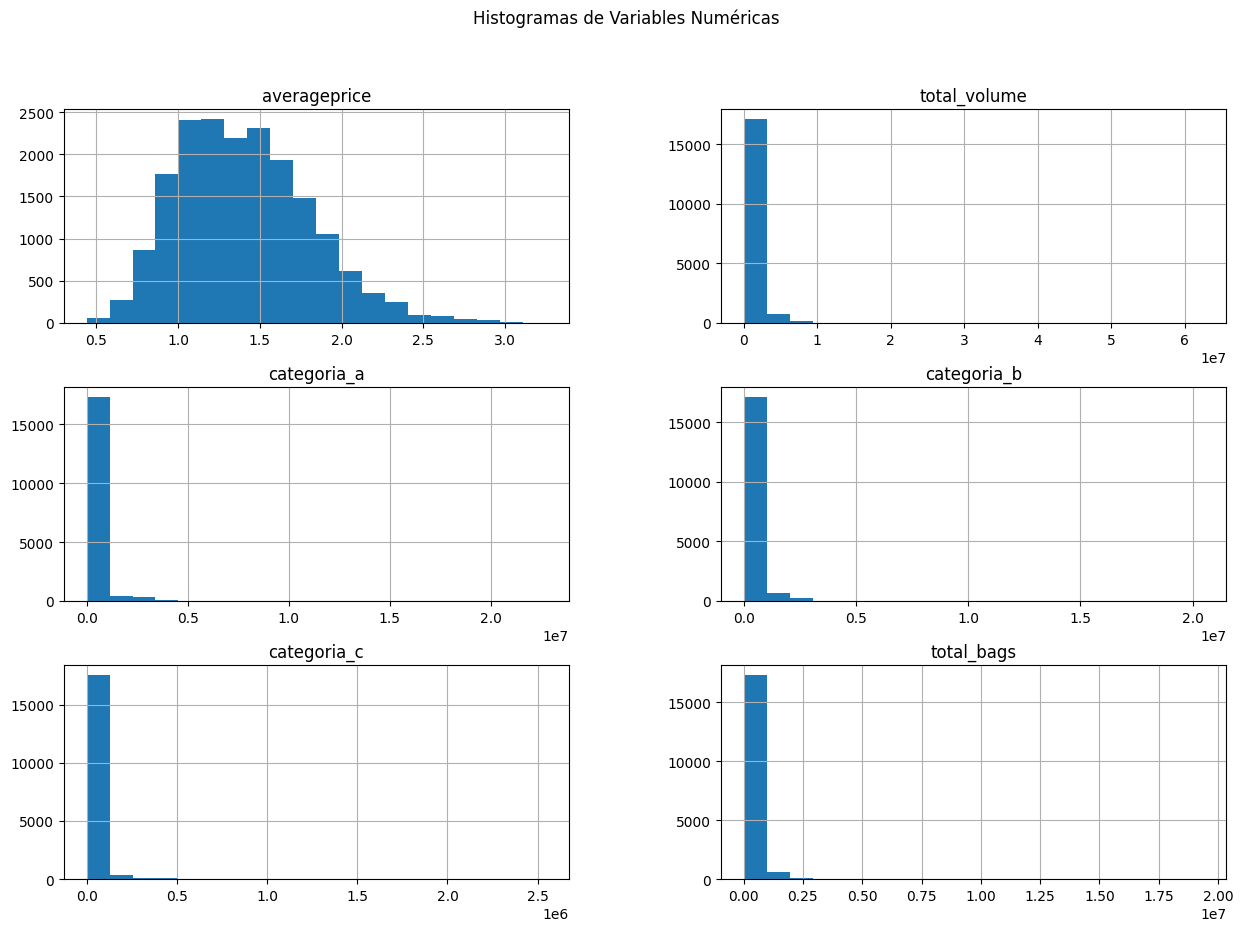

In [853]:
# Histogramas de variables numéricas
# Update num_vars to match the modified column names in df
num_vars = ['averageprice', 'total_volume', 'categoria_a', 'categoria_b', 'categoria_c', 'total_bags']
df_snow[num_vars].hist(bins=20, figsize=(15, 10))
plt.suptitle('Histogramas de Variables Numéricas')
plt.show()

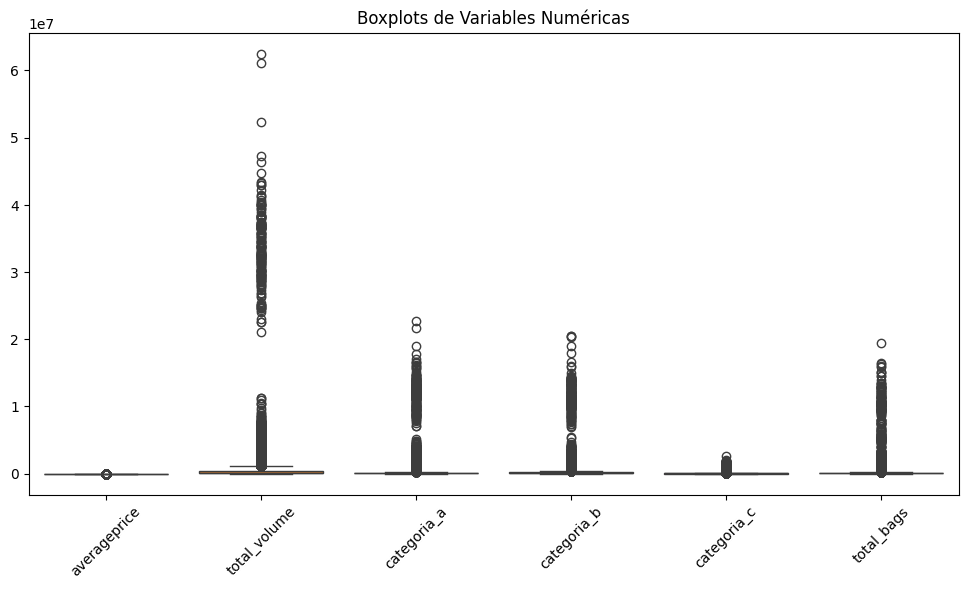

In [854]:
# Boxplots para outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_snow[num_vars])
plt.title('Boxplots de Variables Numéricas')
plt.xticks(rotation=45)
plt.show()

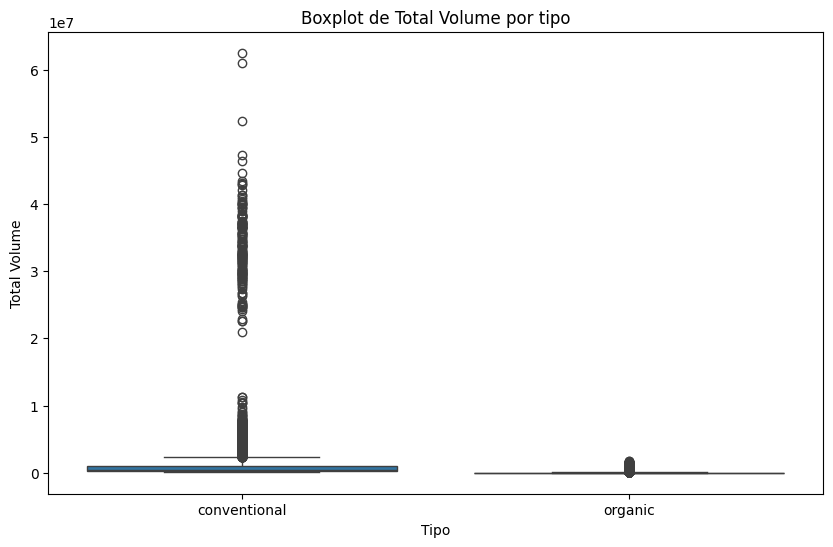

In [855]:
#boxplot de type y total volume
plt.figure(figsize=(10,6))
sns.boxplot(x='type', y='total_volume', data=df_snow)
plt.title('Boxplot de Total Volume por tipo')
plt.xlabel('Tipo')
plt.ylabel('Total Volume')
plt.show()

# 🌟 Limpieza y Normalización de Datos

In [856]:
df_snow.columns

Index(['unnamed:_0', 'date', 'averageprice', 'total_volume', 'categoria_a',
       'categoria_b', 'categoria_c', 'total_bags', 'small_bags', 'large_bags',
       'xlarge_bags', 'type', 'year', 'region'],
      dtype='object')

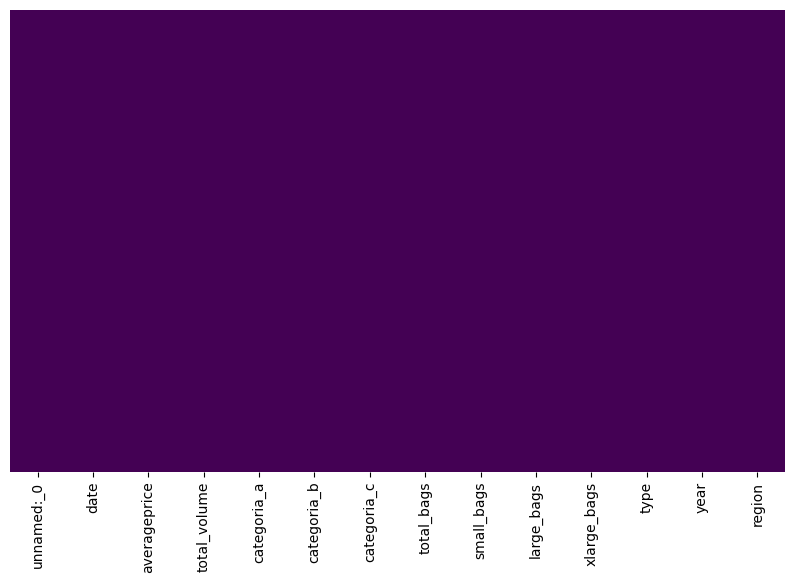

In [857]:
# Visualización de valores nulos
plt.figure(figsize=(10,6))
sns.heatmap(df_snow.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.show()

In [858]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

In [859]:
#limpieza inicial del DataFrame
df_snow = df_snow.drop(columns=['unnamed: 0', 'date'], errors='ignore')


In [860]:
#Tratamiento de outliers (valores atípicos)

# Verificar filas antes del tratamiento de outliers
print("Filas antes del tratamiento de outliers:", df_snow.shape[0])

# Tratamiento de outliers (ejemplo para 'total_volume')
Q1 = df_snow['total_volume'].quantile(0.25)
Q3 = df_snow['total_volume'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = (df_snow['total_volume'] < lower_bound) | (df_snow['total_volume'] > upper_bound)
print("Outliers detectados:", outliers.sum())

# Aplicar filtro
df_snow = df_snow[~outliers]

# Verificar filas después del tratamiento
print("Filas después del tratamiento de outliers:", df_snow.shape[0])

Filas antes del tratamiento de outliers: 18249
Outliers detectados: 2297
Filas después del tratamiento de outliers: 15952


In [861]:
#Transformación de variables categóricas
# Variables categóricas a dummies
df_snow = pd.get_dummies(df_snow, columns=['type', 'region'], drop_first=True)

In [862]:
#Separación de variables independientes (X) y objetivo (y)
# Definir variables
X = df_snow.drop('averageprice', axis=1)
y = df_snow['averageprice']

In [863]:
#Estandarización de los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [864]:
# División en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
print("Datos de entrenamiento:", X_train.shape, y_train.shape)
print("Datos de prueba:", X_test.shape, y_test.shape)

Datos de entrenamiento: (12761, 64) (12761,)
Datos de prueba: (3191, 64) (3191,)


# 🤖 Modelos Predictivos

In [681]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine,fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report,
                             mean_squared_error, r2_score)
from sklearn.preprocessing import StandardScaler

In [682]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("\n=== Regresión Lineal ===")
print(f"MSE: {mse_lr:.4f}")  # 4 decimales
print(f"R²: {r2_lr:.4f}\n")



=== Regresión Lineal ===
MSE: 0.0667
R²: 0.5616



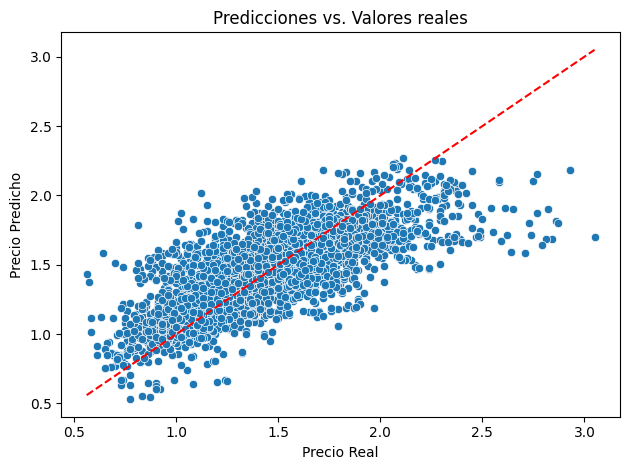

In [683]:

sns.scatterplot(x=y_test, y=y_pred_lr)
plt.xlabel('Precio Real')
plt.ylabel('Precio Predicho')
plt.title('Predicciones vs. Valores reales')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')  # línea de identidad
plt.tight_layout()
plt.show()

In [684]:
rf_reg = RandomForestRegressor(n_estimators=100, max_depth=8, random_state=42)
rf_reg.fit(X_train, y_train)

y_pred_rf = rf_reg.predict(X_test)
MSE_RF = mean_squared_error(y_test, y_pred_rf)
R2_RF = r2_score(y_test, y_pred_rf)
print(f"Random Forest MSE: {mean_squared_error(y_test, y_pred_rf):.3f}")
print(f"Random Forest R2: {r2_score(y_test, y_pred_rf):.3f}")


Random Forest MSE: 0.041
Random Forest R2: 0.732


In [685]:
# --- Modelo 2: Random Forest Regressor ---
rf = RandomForestRegressor(n_estimators=100, max_depth=8, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print("=== Random Forest ===")
print(f"MSE: {mse_rf:.4f}")
print(f"R²: {r2_rf:.4f}\n")

=== Random Forest ===
MSE: 0.0407
R²: 0.7322



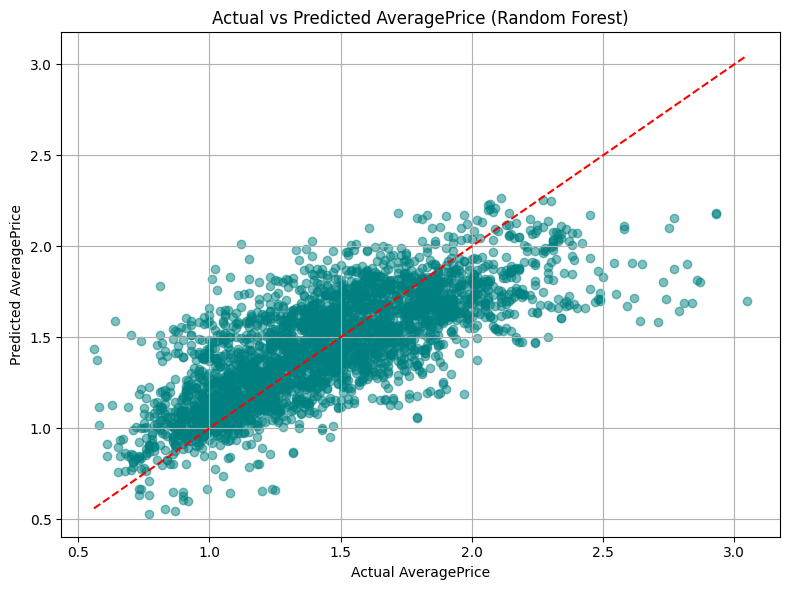

In [686]:
# Gráfica de valores reales vs predicciones
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_lr, alpha=0.5, color='teal')
plt.xlabel('Actual AveragePrice')
plt.ylabel('Predicted AveragePrice')
plt.title('Actual vs Predicted AveragePrice (Random Forest)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Línea ideal
plt.grid(True)
plt.tight_layout()
plt.show()

In [687]:
gb_reg = GradientBoostingRegressor(
    n_estimators=150, learning_rate=0.05, max_depth=4, random_state=42
)
gb_reg.fit(X_train, y_train)

y_pred_gb = gb_reg.predict(X_test)
MSE_GB = mean_squared_error(y_test, y_pred_gb)
R2_GB = r2_score(y_test, y_pred_gb)
print(f"Gradient Boosting MSE: {mean_squared_error(y_test, y_pred_gb):.3f}")
print(f"Gradient Boosting R2: {r2_score(y_test, y_pred_gb):.3f}")

Gradient Boosting MSE: 0.037
Gradient Boosting R2: 0.759


In [688]:
mlp_reg = MLPRegressor(
    hidden_layer_sizes=(64,32), activation='relu', solver='adam', max_iter=500, random_state=42
)
mlp_reg.fit(X_train, y_train)

y_pred_mlp = mlp_reg.predict(X_test)
MSE_MLP = mean_squared_error(y_test, y_pred_mlp)
R2_MLP = r2_score(y_test, y_pred_mlp)
print(f"MLP Regressor MSE: {mean_squared_error(y_test, y_pred_mlp):.3f}")
print(f"MLP Regressor R2: {r2_score(y_test, y_pred_mlp):.3f}")


MLP Regressor MSE: 0.020
MLP Regressor R2: 0.870


In [689]:
# --- Modelo 3: Red Neuronal (scikit-learn) ---
mlp = MLPRegressor(
    hidden_layer_sizes=(64, 32),  # Arquitectura: 64 neuronas -> 32 neuronas
    activation='relu',
    solver='adam',
    max_iter=500,
    random_state=42
)

mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_test)
mse_mlp = mean_squared_error(y_test, y_pred_mlp)
r2_mlp = r2_score(y_test, y_pred_mlp)

print("=== Red Neuronal (MLPRegressor) ===")
print(f"MSE: {mse_mlp:.4f}")
print(f"R²: {r2_mlp:.4f}\n")

=== Red Neuronal (MLPRegressor) ===
MSE: 0.0198
R²: 0.8699



Matriz de Confusión:
 [[ 584  384]
 [ 135 2088]]
              precision    recall  f1-score   support

           0       0.81      0.60      0.69       968
           1       0.84      0.94      0.89      2223

    accuracy                           0.84      3191
   macro avg       0.83      0.77      0.79      3191
weighted avg       0.83      0.84      0.83      3191



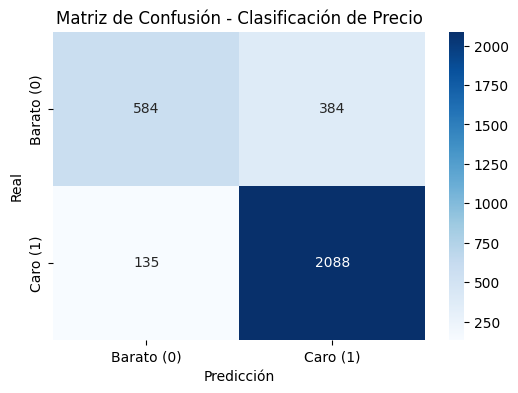

In [690]:
# Clasificar precios: barato = 0, caro = 1
y_test_class = (y_test > 1.2).astype(int)
y_pred_class = (y_pred_lr > 1.2).astype(int)

# Calcular matriz de confusión
cm = confusion_matrix(y_test_class, y_pred_class)
print("Matriz de Confusión:\n", cm)
print(classification_report(y_test_class, y_pred_class))

# Graficar la matriz
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Barato (0)', 'Caro (1)'],
            yticklabels=['Barato (0)', 'Caro (1)'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión - Clasificación de Precio')
plt.show()

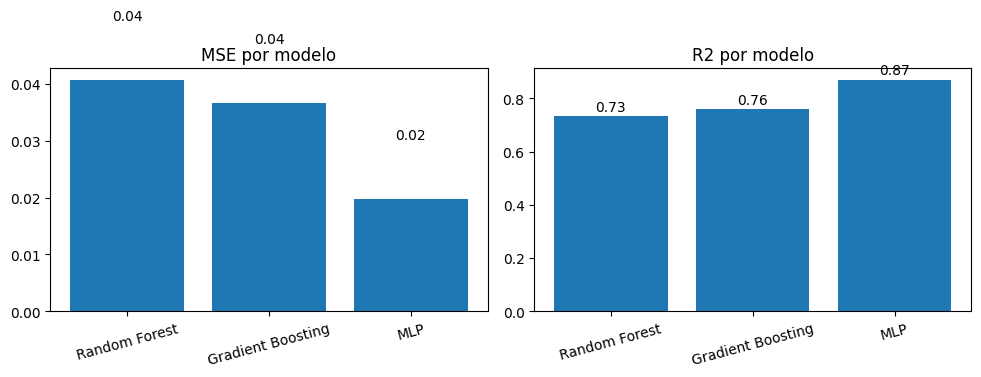

In [691]:
models = ['Random Forest', 'Gradient Boosting', 'MLP']
mse = [MSE_RF,
      MSE_GB,
      MSE_MLP]
r2 = [R2_RF,
      R2_GB,
      R2_MLP]

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.bar(models, mse)
for i, v in enumerate(mse):
    plt.text(i, v + 0.01, str(round(v, 2)), ha='center', va='bottom')
plt.title('MSE por modelo')
plt.xticks(rotation=15)
plt.subplot(1,2,2)
plt.bar(models, r2)
for i, v in enumerate(r2):
    plt.text(i, v + 0.01, str(round(v, 2)), ha='center', va='bottom')
plt.title('R2 por modelo')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()